In [2]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Generate random input data to train on 
two variable linear model f(x,z) = a*x + b*z+c


In [32]:
observations = 100000
xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
zs = np.random.uniform(low = -10, high = 10, size = (observations,1))
inputs = np.column_stack((xs,zs)) #matrix of size (1000,2)

In [33]:
inputs.shape

(100000, 2)

create  targets we will aim at (targets = f(x,z) = 2*x - 3*z +5+noise)

In [34]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5+noise
print(targets.shape)


(100000, 1)


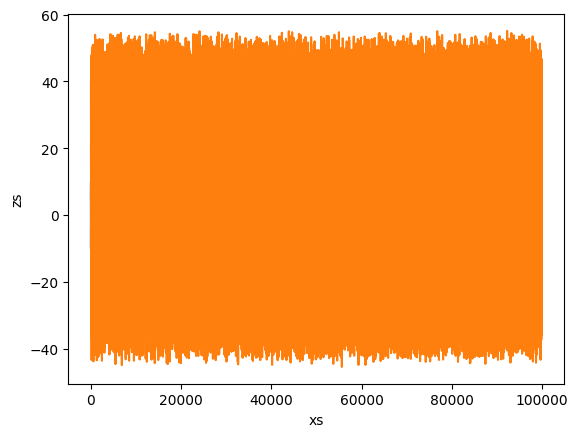

In [35]:
plot_targets = targets
plot_targets = plot_targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')


plt.show()

y = xw + b -- > y (targets , t) and w,b (vary)

instead of starting from an arbitrary numbers, we randomly select some small initial weights. Weights randomly ranging from -0.1 to 0.1

In [36]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size = (2,1))
biases = np.random.uniform(-init_range,init_range, size = 1)

print(weights)
print(biases)

[[-0.02185603]
 [ 0.05144554]]
[0.08668098]


In [37]:
#set a learning rate
learning_rate = 0.02

Game plan for each iteration: 
1. calculate outputs
2. Compare outputs to targets throught the loss
3. Print the loss
4. Adjust weights and biases

procedure will be repeated for next iteration

Train the model

In [40]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    #loss = np.sum(deltas ** 2)/2/observations
    loss = np.sum(deltas ** 2)/observations #gives average loss per observation
    print(loss)
    detlas_scaled = deltas/ observations
    weights = weights - learning_rate * np.dot(inputs.T, detlas_scaled)
    biases = biases - learning_rate * np.sum(detlas_scaled)

0.757364663616538
0.7405489889970084
0.7243992023710543
0.7088889350778849
0.69399286263573
0.6796866633931397
0.665946978817661
0.6527513753570526
0.6400783078107751
0.6279070841519278
0.6162178317422224
0.6049914648848129
0.5942096536620096
0.5838547940069964
0.573909978960685
0.5643589710667776
0.5551861758599601
0.5463766164039487
0.5379159088378065
0.5297902388906061
0.5219863393261005
0.5144914682805601
0.5072933884584185
0.500380347151758
0.49374105705100213
0.4873646778154937
0.4812407983738675
0.47535941992530495
0.4697109396139372
0.4642861348497235
0.4590761482502103
0.4540724731785898
0.4492669398544359
0.444651702014447
0.44021922410141096
0.4359622689604826
0.4318738860226727
0.42794739995626485
0.4241763997676302
0.4205547283336361
0.4170764723485685
0.41373595266914737
0.4105277150418682
0.4074465211975398
0.4044873402984689
0.40164534072432806
0.3989158821832994
0.39629450813561123
0.39377693851709555
0.39135906275088667
0.389036933035853
0.3868067579008024
0.384664896

In [41]:
#print weights and biases and see if we have worked correctly
print(weights, biases)  #(targets = f(x,z) = 2*x - 3*z +5+noise)

[[ 1.9995751 ]
 [-3.00043022]] [4.91383674]


plot last outputs vs targets

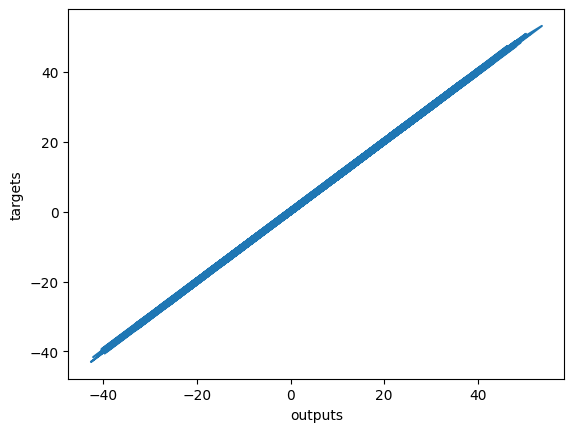

In [31]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()